In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#training dataset
df = pd.read_csv('/content/Barley_Maculatura_V01_2022.csv')

In [ ]:
df.head()

,sample_date,avg_ta,min_ta,max_ta,avg_hum,cum_rain,cum_leaf_wet,prim_output,onset_of_symptoms
0,3/1/2022,4.619024,-0.63,8.64,57.682927,0.0,0.000000,0,0
1,3/2/2022,3.321667,-4.68,11.27,66.729167,0.0,0.983333,0,0
2,3/3/2022,6.588958,1.23,14.45,63.447917,0.0,0.000000,0,0
3,3/4/2022,5.757292,-1.79,12.27,74.385417,0.0,3.850000,0,0
4,3/5/2022,6.203125,1.23,8.66,70.395833,0.4,9.183333,0,0


In [ ]:
df.shape

(334, 9)

In [ ]:
df.isna().sum()

sample_date          0
avg_ta               0
min_ta               0
max_ta               0
avg_hum              0
cum_rain             0
cum_leaf_wet         0
prim_output          0
onset_of_symptoms    0
dtype: int64

In [ ]:
df['sample_date'] = pd.to_datetime(df['sample_date'], format='%m/%d/%Y')

print(df)

    sample_date     avg_ta  min_ta  max_ta    avg_hum  cum_rain  cum_leaf_wet  \
0    2022-03-01   4.619024   -0.63    8.64  57.682927       0.0      0.000000   
1    2022-03-02   3.321667   -4.68   11.27  66.729167       0.0      0.983333   
2    2022-03-03   6.588958    1.23   14.45  63.447917       0.0      0.000000   
3    2022-03-04   5.757292   -1.79   12.27  74.385417       0.0      3.850000   
4    2022-03-05   6.203125    1.23    8.66  70.395833       0.4      9.183333   
..          ...        ...     ...     ...        ...       ...           ...   
329  2023-01-24  27.400000   22.60   30.80  79.400000       0.0      0.000000   
330  2023-01-25  26.800000   22.10   30.60  73.100000       0.0      0.000000   
331  2023-01-26  26.200000   20.30   31.20  73.600000       0.0      0.000000   
332  2023-01-27  26.600000   20.40   31.00  76.900000       0.0      0.000000   
333  2023-01-28  27.500000   21.40   32.20  68.400000       0.0      0.000000   

     prim_output  onset_of_

In [ ]:
df.describe()

,avg_ta,min_ta,max_ta,avg_hum,cum_rain,cum_leaf_wet,prim_output,onset_of_symptoms
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,19.246317,13.031377,25.267844,71.639227,0.863473,5.276996,0.008982,0.011976
std,6.599800,6.499773,7.138183,9.678109,3.628952,7.113063,0.094489,0.108941
min,2.733636,-4.970000,6.250000,22.322917,0.000000,0.000000,0.000000,0.000000
25%,14.200000,8.792500,19.710000,66.171622,0.000000,0.000000,0.000000,0.000000
50%,21.518229,15.135000,27.410000,73.091667,0.000000,1.375000,0.000000,0.000000
75%,24.837031,18.157500,31.000000,77.800000,0.000000,8.250000,0.000000,0.000000
max,30.500000,24.000000,38.200000,94.218750,29.800000,23.500000,1.000000,1.000000


In [ ]:
df.columns

Index(['sample_date', 'avg_ta', 'min_ta', 'max_ta', 'avg_hum', 'cum_rain',
       'cum_leaf_wet', 'prim_output', 'onset_of_symptoms'],
      dtype='object')

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

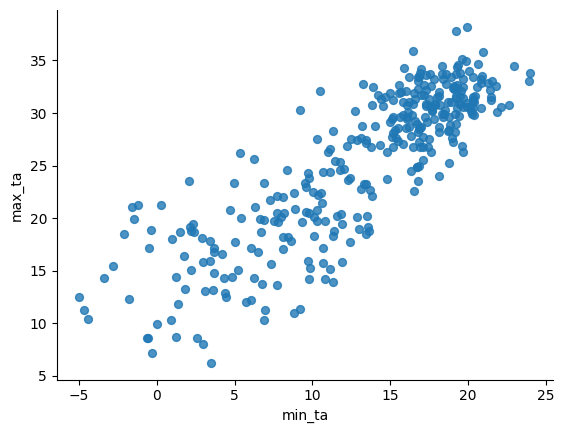

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='min_ta', y='max_ta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

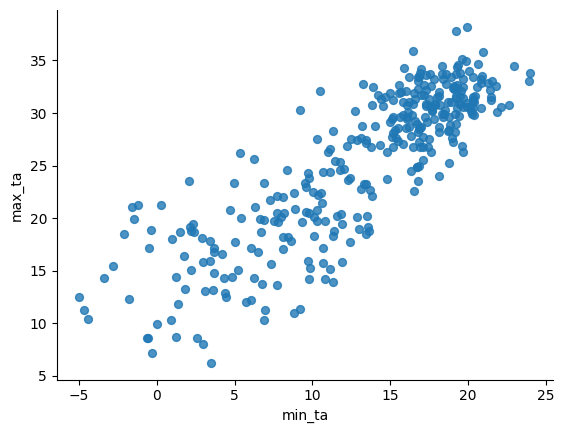

In [ ]:
# Scatter plot of temperature

df.plot(kind='scatter', x='min_ta', y='max_ta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


KeyError: ignored

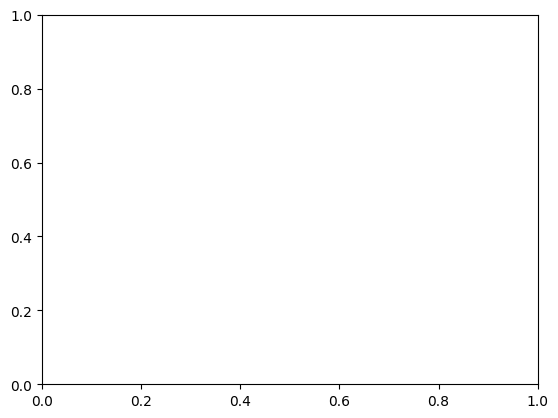

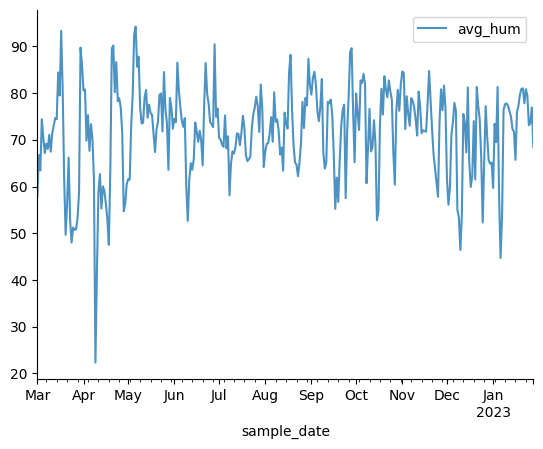

In [16]:
# Line plot of Humidity

df.plot(kind='line', x='sample_date', y='avg_hum', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

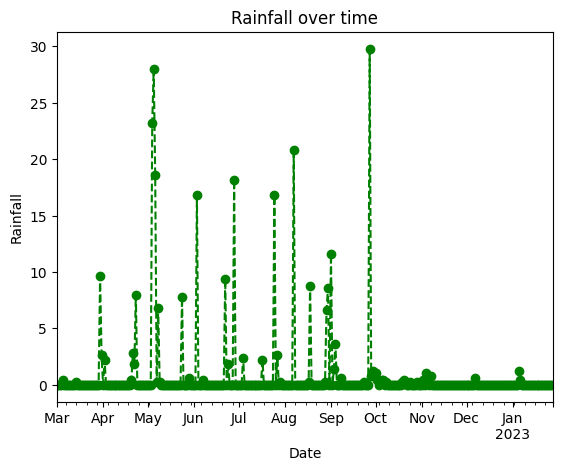

In [ ]:
# scatter date rainfall

df.groupby('sample_date')['cum_rain'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall over time')
plt.show()


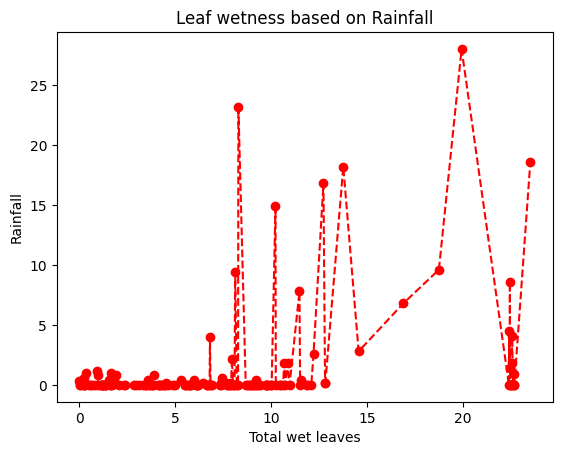

In [ ]:
df.groupby('cum_leaf_wet')['cum_rain'].mean().plot(kind='line', color='red',marker='o', linestyle='dashed')
plt.xlabel('Total wet leaves')
plt.ylabel('Rainfall')
plt.title('Leaf wetness based on Rainfall')
plt.show()

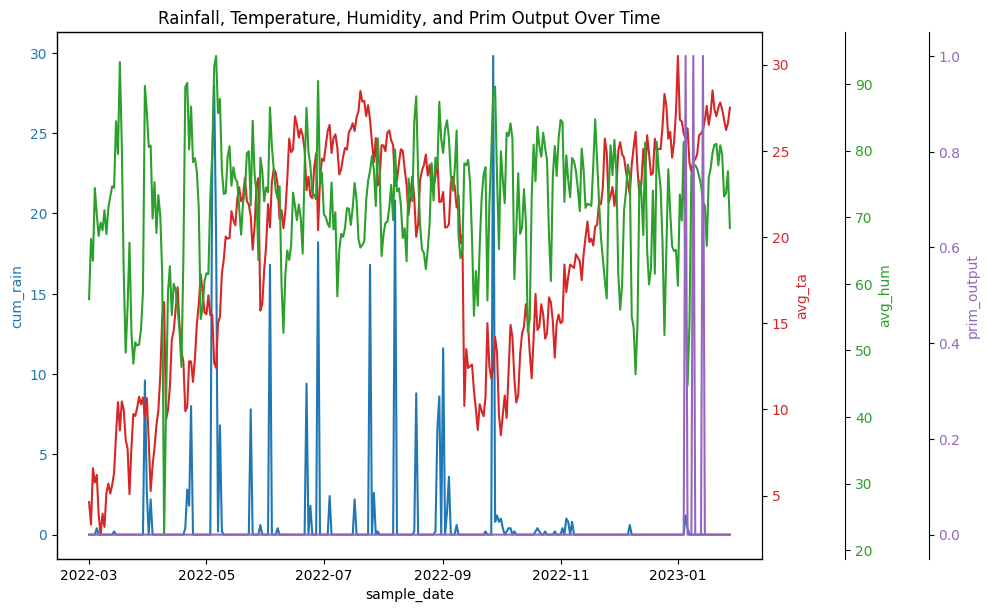

In [17]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Rainfall
color = 'tab:blue'
ax1.set_xlabel('sample_date')
ax1.set_ylabel('cum_rain', color=color)
ax1.plot(df['sample_date'], df['cum_rain'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('avg_ta', color=color)
ax2.plot(df['sample_date'], df['avg_ta'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating a third y-axis for Humidity
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('avg_hum', color=color)
ax3.plot(df['sample_date'], df['avg_hum'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Creating a fourth y-axis for Prim Output
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('prim_output', color=color)
ax4.plot(df['sample_date'], df['prim_output'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

# Adjust layout to prevent clipping of the secondary axes
fig.tight_layout()

plt.title('Rainfall, Temperature, Humidity, and Prim Output Over Time')
plt.show()

In [19]:
df.rename(columns = {'onset_of_symptoms':'Disease'}, inplace = True)

SPLITTING DATESET

In [20]:
df1 = df.drop("sample_date", axis=1)
P = df1[["Disease"]]
X = df1.drop(["Disease"],axis=1)
Y = df1.drop(["Disease"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

In [21]:
print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')

Train: (267, 7), (267, 1)
Test: (67, 7), (67, 1)


Random forest

In [22]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 1.0
testing accuracy is: 0.9850746268656716


<ipython-input-22-2a655bf3f7df>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(x_train,y_train)


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9850746268656716


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM model

In [24]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9850746268656716


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [26]:
# value using LabelEncoder
encoder = LabelEncoder()
df1["Disease"] = encoder.fit_transform(df1["Disease"])

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.97058824 0.97058824 0.97058824 0.97058824 1.         1.
 1.         1.         1.         1.        ]
Mean Score: 0.9882352941176471
Gaussian NB
Scores: [0.88235294 0.91176471 0.94117647 0.61764706 0.33333333 0.81818182
 0.63636364 0.39393939 0.3030303  1.        ]
Mean Score: 0.6837789661319073
Random Forest
Scores: [0.97058824 0.97058824 0.97058824 0.97058824 1.         1.
 1.         1.         1.         1.        ]
Mean Score: 0.9882352941176471


Accuracy on train data by SVC Classifier: 98.87640449438202
Accuracy on test data by SVC Classifier: 98.50746268656717


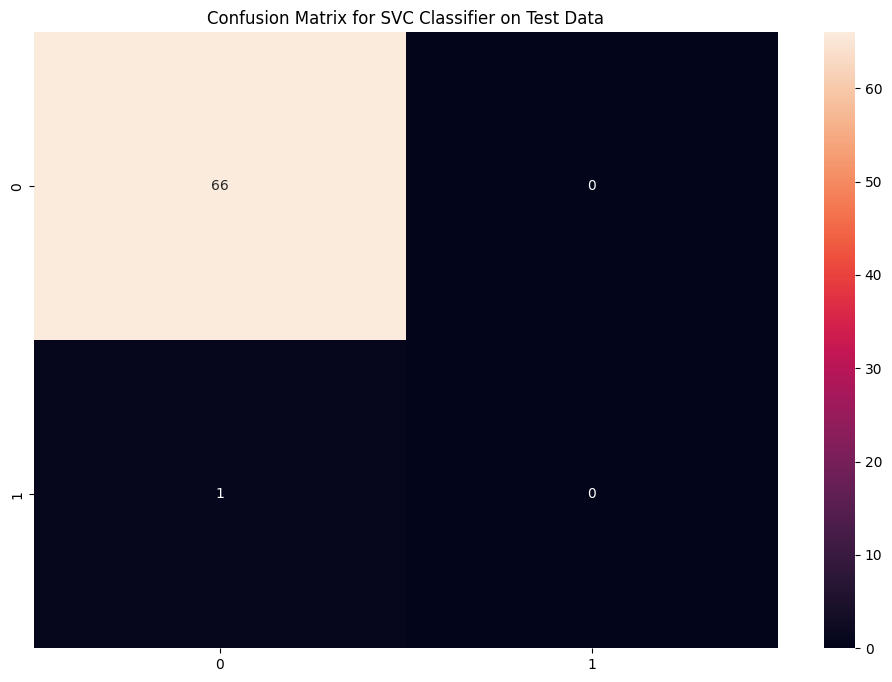

Accuracy on train data by Gaussian NB Classifier: 56.92883895131086
Accuracy on test data by Gaussian NB Classifier: 58.2089552238806


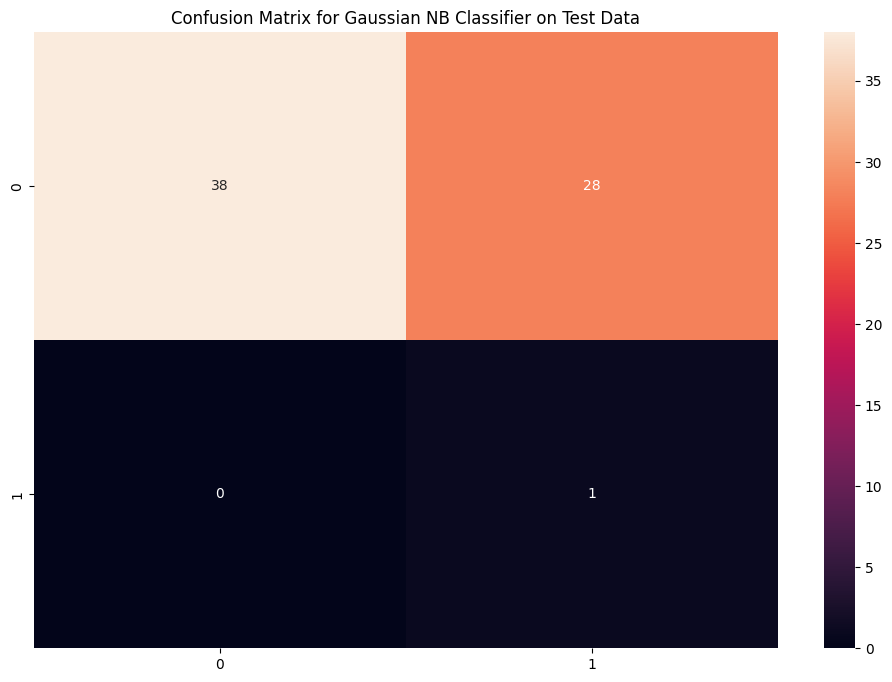

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 98.50746268656717


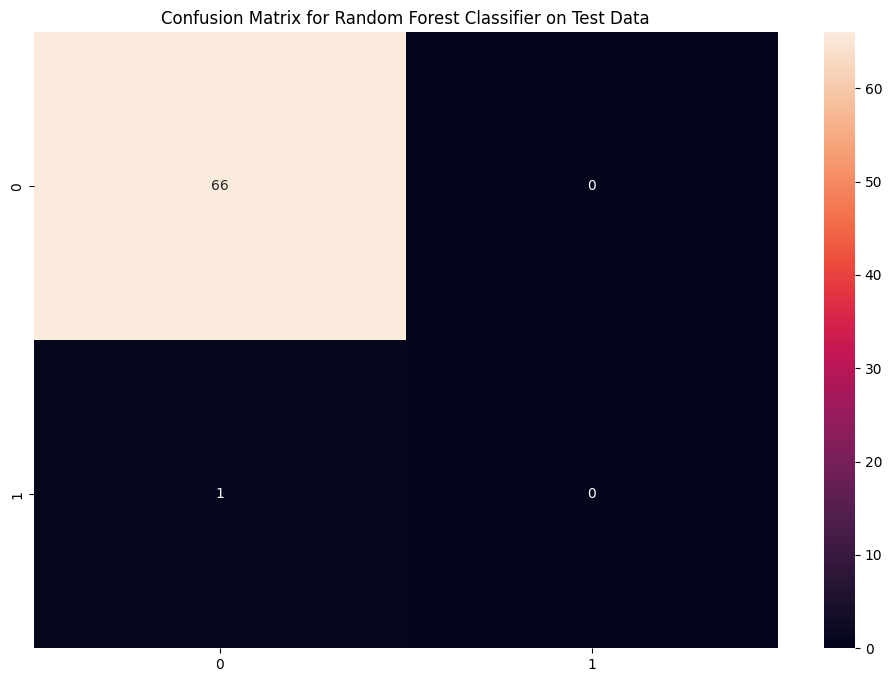

In [27]:
# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [28]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

Accuracy on Test dataset by the combined model: 100.0


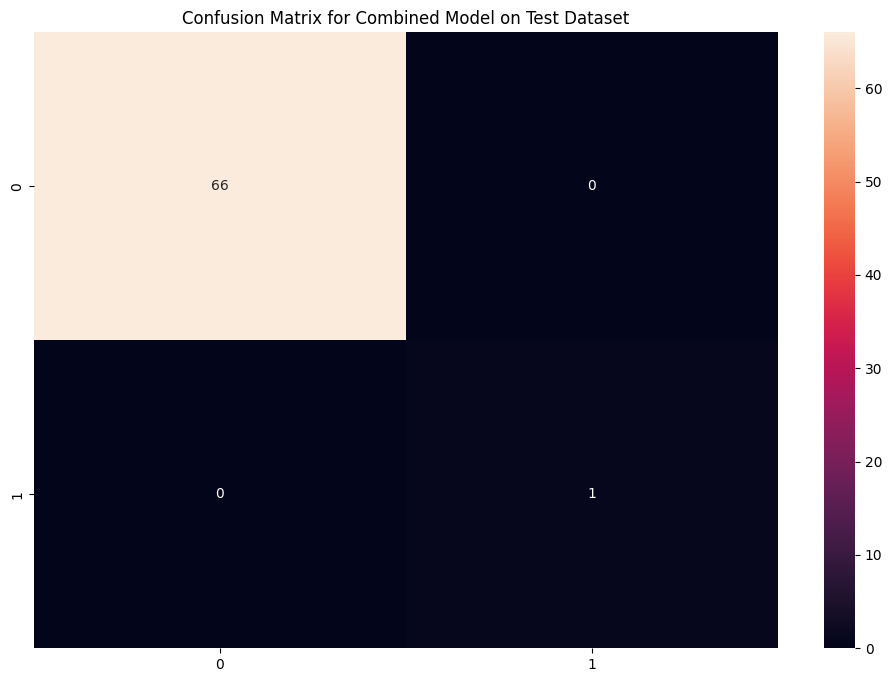

In [29]:
# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

# Use SciPy's mode function
final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)

# Calculating and printing accuracy on the test dataset
accuracy = accuracy_score(y_test, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Visualizing the confusion matrix
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()